In [2]:
import pandas as pd

In [3]:
df = pd.read_json('RU_dataset.json')

In [4]:
df = df.rename(columns={0:'Texts', 1:'Annotation'})

In [5]:
with pd.option_context('display.max_colwidth', None):
    display(df.sample(5))

Texts  \
42907                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [6]:
df['Annotation'].unique()

array(['suicide', 'non-suicide'], dtype=object)

In [7]:
df['Target'] = df['Annotation'].apply(lambda x: 1 if x=='suicide' else 0)
df

,Texts,Annotation,Target
0,Бывшая жена угрожает самоубийством Недавно я н...,suicide,1
1,"Я странный? На меня не влияют комплименты, есл...",non-suicide,0
2,Наконец-то 2020 год почти закончился... Так чт...,non-suicide,0
3,"мне нужна помощь, просто помоги мне, я так плачу",suicide,1
4,"Я так растеряна. Здравствуйте, меня зовут Адам...",suicide,1
...,...,...,...
47992,"Я только что увидел забавный мем, прежде чем п...",suicide,1
47993,"Я боюсь, мне некому рассказать. У меня инфекци...",non-suicide,0
47994,"Педофилия, членовредительство и мысли о самоуб...",suicide,1
47995,Я больше не могу справляться. Почти 2 месяца н...,suicide,1


## Data analysis and preprocessing

In [8]:
df['Annotation'].value_counts()

non-suicide    24081
suicide        23916
Name: Annotation, dtype: int64

In [9]:
df['Texts'].isnull().any()

False

In [10]:
df[df['Texts'] == '']

,Texts,Annotation,Target


In [11]:
df = df.drop_duplicates(subset=['Texts'])

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Annotation'>

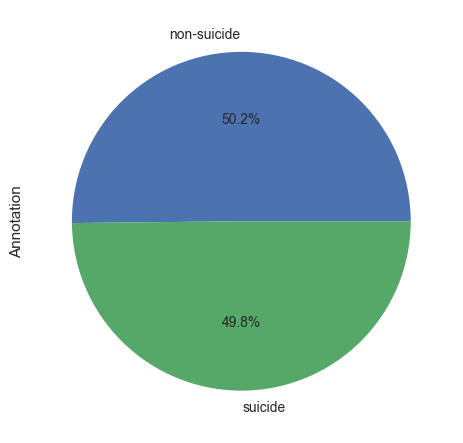

In [21]:
df['Annotation'].value_counts().plot(kind='pie', autopct='%1.1f%%')

*vectorizers*: tf-idf, word2vec
*classifiers*: kNN, LogisticRegressionClassifier, Naive Bayes, SVM

In [22]:
# let's implement preprocess: tokenization, filter by stopwords, normal form
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()
nltk.download('punkt')
sw = stopwords.words('russian')

[nltk_data] Downloading package punkt to /Users/boris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
def preprocess_normal(doc):
    words = [morph.parse(word.lower())[0].normal_form for word in word_tokenize(doc) if word.isalpha()]
    filtered = [word for word in words if word not in sw]
    return ' '.join(filtered)

In [24]:
def preprocess_tokenize(doc):
    words = [word.lower() for word in word_tokenize(doc) if word.isalpha()]
    filtered = [word for word in words if word not in sw]
    return ' '.join(filtered)

In [34]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [35]:
df['Tokenised'] = df['Texts'].parallel_apply(preprocess_tokenize)
df['Normalised'] = df['Texts'].parallel_apply(preprocess_normal)

/var/folders/qw/n49r3pv91jzc5byqn15dyqth0000gr/T/ipykernel_18899/3381015055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokenised'] = df['Texts'].parallel_apply(preprocess_tokenize)


/var/folders/qw/n49r3pv91jzc5byqn15dyqth0000gr/T/ipykernel_18899/3381015055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Normalised'] = df['Texts'].parallel_apply(preprocess_normal)


In [36]:
with pd.option_context('display.max_colwidth', None):
    display(df[['Texts', 'Tokenised', 'Normalised']].sample(5))

,Texts,Tokenised,Normalised
2108,"Реддит подарил мне девушку!! Я так счастлив прямо сейчас! То самое, что сделало меня неудачником, подарило мне девушку! Мы используем прямые сообщения Reddit, чтобы оставаться на связи. Я знаю из своей школы. Она очень умная и классная. Спасибо Реддит.",реддит подарил девушку счастлив прямо самое сделало неудачником подарило девушку используем прямые сообщения reddit оставаться связи знаю своей школы очень умная классная спасибо реддит,реддит подарить девушка счастливый прямо самый сделать неудачник подарить девушка использовать прямой сообщение reddit оставаться связь знать свой школа очень умный классный спасибо реддит
3616,"Я больше не могу этого терпеть. Я уже несколько месяцев склоняюсь к самоубийству, а терапия и лекарства не помогают. В понедельник я начинаю более интенсивную программу частичной госпитализации, но каждый день - это такая агония, и я даже не думаю, что смогу дожить до этого момента. Я не могу функционировать. Больше ничто не отвлекает меня от моих мыслей. Я пытаюсь связаться с людьми, но никто не отвечает. Резка больше даже не помогает мне успокоиться. У меня нет абсолютно никакой надежды, и я достиг своего конца.",могу терпеть несколько месяцев склоняюсь самоубийству терапия лекарства помогают понедельник начинаю интенсивную программу частичной госпитализации каждый день это такая агония думаю смогу дожить момента могу функционировать ничто отвлекает моих мыслей пытаюсь связаться людьми никто отвечает резка помогает успокоиться абсолютно никакой надежды достиг своего конца,большой мочь это терпеть несколько месяц склоняться самоубийство терапия лекарство помогать понедельник начинать интенсивный программа частичный госпитализация каждый день это агония думать смочь дожить это момент мочь функционировать большой ничто отвлекать мысль пытаться связаться человек никто отвечать резка большой помогать успокоиться абсолютно никакой надежда достигнуть свой конец
13625,"Астронавты Дуг и Боб вернулись!! Помните запуск космического корабля НАСА в июне, два человека на борту приземлились сегодня.",астронавты дуг боб вернулись помните запуск космического корабля наса июне человека борту приземлились сегодня,астронавт дуга боб вернуться помнить запуск космический корабль наса июнь человек борт приземлиться сегодня
41079,"Мне всего 19, но... я чувствую, что моя жизнь окончена. Надо мной издевались в средней и старшей школе, и единственное, что помогло мне пережить этот опыт, — это надежда на то, что мое будущее будет лучше. Я работал изо всех сил и получил отличные оценки... но я не могу позволить себе поступить в колледж. Мои родители слишком много зарабатывают на финансовой помощи и отказываются выдать мне кредит. Я смотрю на профили в Facebook всех людей, которые издевались надо мной, и они уезжают в колледж, развлекаются. Они выигрывают, я проигрываю.\n\nА еще я очень непривлекательна... мои родители никогда не платили за брекеты, да и в остальном я тоже не очень хорошо выгляжу. Единственные парни, которых я привлекаю, — это мерзавцы, которые думают, что я легкая, потому что у меня низкая самооценка. Я не могу смотреть людям в глаза. Я не могу улыбаться из-за зубов. Я не могу развлечься или получить хорошо оплачиваемую работу из-за того, как выгляжу.\n\nЯ теряю тех немногих друзей, которых приобрел в старшей школе. Они уехали в колледж, а я застрял в том же городе и в том же распорядке дня. Я бы хотел завести новых друзей, но я очень застенчивый, поэтому трудно сделать это, не посещая ни с кем занятия. Скоро у всех моих старых друзей появятся новые друзья в колледже и дипломы, а я все равно останусь здесь, в том же дерьмовом городе, все еще работая на дерьмовой работе.\n\nЯ не уверен, что еще мне делать. Я не покончил с собой, когда был моложе, потому что думал, что у меня лучшее будущее, но теперь будущее здесь, и у меня нет ничего, что могло бы меня порадовать. Я не хочу в 30 лет жалеть, что покончил с собой сейчас. Я не уверен, что мне останется.\n\nКакие-либо предложения?",чу